In [7]:
import pandas as pd
import wandb
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def get_runs(runs, model_alias):
    data = []
    for i, run in enumerate(runs):
        summary = run.summary._json_dict
        try:
            metrics = {
                "P@1-CSLS": summary["precision_at_1-csls_knn_100"],
                "P@5-CSLS": summary["precision_at_5-csls_knn_100"],
                "P@10-CSLS": summary["precision_at_10-csls_knn_100"],
                "P@30-CSLS": summary["precision_at_30-csls_knn_100"],
                "P@50-CSLS": summary["precision_at_50-csls_knn_100"],
                "P@100-CSLS": summary["precision_at_100-csls_knn_100"],
                "P@1-NN": summary["precision_at_1-nn"],
                "P@5-NN": summary["precision_at_5-nn"],
                "P@10-NN": summary["precision_at_10-nn"],
                "P@30-NN": summary["precision_at_30-nn"],
                "P@50-NN": summary["precision_at_50-nn"],
                "P@100-NN": summary["precision_at_100-nn"]
            }
        except:
            print(i)
            print(summary)
        # fasttext
        if model_alias == "ft":
            res = {"name": run.name, **metrics, "Layers": run.tags[-1], "Subjects": run.tags[0], "Models": run.tags[1]}
        elif model_alias == "bert":
            res = {"name": run.name, **metrics, "Layers": run.tags[-1], "Subjects": run.tags[1], "Models":run.tags[0]}
        elif model_alias == "gpt2":
            res = {"name": run.name, **metrics, "Layers": run.tags[-1], "Subjects": run.tags[0], "Models": run.tags[2]}
        elif model_alias == "opt":
            res = {"name": run.name, **metrics, "Layers": run.tags[2], "Subjects": run.tags[0], "Models": run.tags[3]}
        else:
            print("Please choose the correct model result.")

        # Pereira
        # if model_alias == "ft":
        #     res = {"name": run.name, **metrics, "Layers": run.tags[-2], "Subjects": run.tags[-1], "Models": run.tags[0]}
        # elif model_alias == "bert":
        #     res = {"name": run.name, **metrics, "Layers": run.tags[-2], "Subjects": run.tags[-1], "Models":run.tags[0]}
        # elif model_alias == "gpt2":
        #     res = {"name": run.name, **metrics, "Layers": run.tags[-2], "Subjects": run.tags[-1], "Models": run.tags[-3]}
        # elif model_alias == "opt":
        #     res = {"name": run.name, **metrics, "Layers": run.tags[-3], "Subjects": run.tags[-1], "Models": run.tags[-2]}
        # else:
        #     print("Please choose the correct model result.")

        data.append(res)
    return data

In [9]:
def export_df(dataname, method):
    api = wandb.Api()
    df_bert = pd.DataFrame(get_runs(api.runs(path=f"jalee/{dataname}-brain2bert_{method}_averaged"), "bert"))
    # df_ft = pd.DataFrame(get_runs(api.runs(path=f"jalee/{dataname}-brain2ft_{method}_averaged"), "ft"))
    df_gpt2 = pd.DataFrame(get_runs(api.runs(path=f"jalee/{dataname}-brain2gpt2_{method}_averaged"), "gpt2"))
    df_opt = pd.DataFrame(get_runs(api.runs(path=f"jalee/{dataname}-brain2opt_{method}_averaged"), "opt"))
    # df_gpt = pd.concat([df_gpt2, df_opt], axis="index").reset_index().round(2)

    return df_bert, df_gpt2, df_opt

In [10]:
method = "procrustes"
# method = "regression"
if method == "procrustes":
    METHOD = "Procrustes Analysis" 
else:
    METHOD = "Ridge Regression"
MODEL_NAME = {'bert_uncased_L-2_H-128_A-2': "BERT$_{\\text{TINY}}$",
                'bert_uncased_L-4_H-256_A-4': "BERT$_{\\text{MINI}}$" ,
                'bert_uncased_L-4_H-512_A-8': "BERT$_{\\text{SMALL}}$",
                'bert_uncased_L-8_H-512_A-8': "BERT$_{\\text{MEDIUM}}$",
                'bert-base-uncased': "BERT$_{\\text{BASE}}$",
                'bert-large-uncased': "BERT$_{\\text{LARGE}}$",
                'gpt2': "GPT2$_{\\text{BASE}}$",
                'gpt2-medium': "GPT2$_{\\text{MEDIUM}}$",
                'gpt2-large': "GPT2$_{\\text{LARGE}}$",
                'gpt2-xl': "GPT2$_{\\text{XL}}$",
                'opt-125m': "OPT$_{\\text{125M}}$",
                'opt-1': "OPT$_{\\text{1.3B}}$",
                'opt-6': "OPT$_{\\text{6.7B}}$",
            'opt-30b': "OPT$_{\\text{30B}}$",
                "fasttext":"fastText"}
df_res = export_df("potter", method)
# df_res = export_df("pereira", method)

model_name = {'bert_uncased_L-2_H-128_A-2': "BERT_TINY",
                'bert_uncased_L-4_H-256_A-4': "BERT_MINI" ,
                'bert_uncased_L-4_H-512_A-8': "BERT_SMALL",
                'bert_uncased_L-8_H-512_A-8': "BERT_MEDIUM",
                'bert-base-uncased': "BERT_BASE",
                'bert-large-uncased': "BERT_LARGE",
                'gpt2': "GPT2_BASE",
                'gpt2-medium': "GPT2_MEDIUM",
                'gpt2-large': "GPT2_LARGE",
                'gpt2-xl': "GPT2_XL",
                'opt-125m': "OPT_125M",
                'opt-1.3b': "OPT_1.3B",
                'opt-6.7b': "OPT_6.7B",
                'opt-30b': "OPT_30B",
                "fasttext":"fastText"}

1675
{}
12
{}
471
{}
930
{}
1221
{}
1546
{}
1864
{}
1914
{}
3269
{}
3821
{}


In [12]:
df = df_res[1]
precision_csls, precision_nn = [], []
for k in [1, 5, 10, 30, 50, 100]:
    precision_csls.append(f'P@{k}-CSLS')
    precision_nn.append(f'P@{k}-NN')
precision = precision_csls + precision_nn

layer_avg = df.groupby(["Models", "Layers"])[precision].mean().reset_index()
layer_avg = layer_avg.groupby(["Models"])[precision].max().reset_index()
layer_avg.insert(loc=layer_avg.columns.get_loc("Models"), column="Summary",
                    value=[f"Ave Max."]*4)

layer_ = df.groupby(["Models", "Layers", "Subjects"])[precision].mean().reset_index()
layer_max = layer_.groupby(["Models"])[precision].max().reset_index()
layer_max.insert(loc=layer_max.columns.get_loc("Models"), column="Summary",
                    value=[f"Single Max."]*4)

layer_avg

,Summary,Models,P@1-CSLS,P@5-CSLS,P@10-CSLS,P@30-CSLS,P@50-CSLS,P@100-CSLS,P@1-NN,P@5-NN,P@10-NN,P@30-NN,P@50-NN,P@100-NN
0,Ave Max.,fold_0,0.059149,6.859240,11.712303,19.846097,24.695523,33.290147,0.072133,6.451230,10.973407,17.807577,21.639083,28.581954
1,Ave Max.,fold_1,0.025445,6.248224,10.665077,19.582990,25.174805,35.622975,0.023436,5.685969,9.500775,16.259557,20.149508,27.074392
2,Ave Max.,fold_2,0.080344,8.163036,12.906605,22.918615,28.409383,37.804610,0.075161,7.695693,11.912555,20.181253,24.417368,31.836414
3,Ave Max.,fold_3,0.039749,8.348064,13.296692,21.127772,25.882061,35.162402,0.026575,7.652810,12.310933,18.909439,22.394996,29.032420


ValueError: Length of values (4) does not match length of index (49)

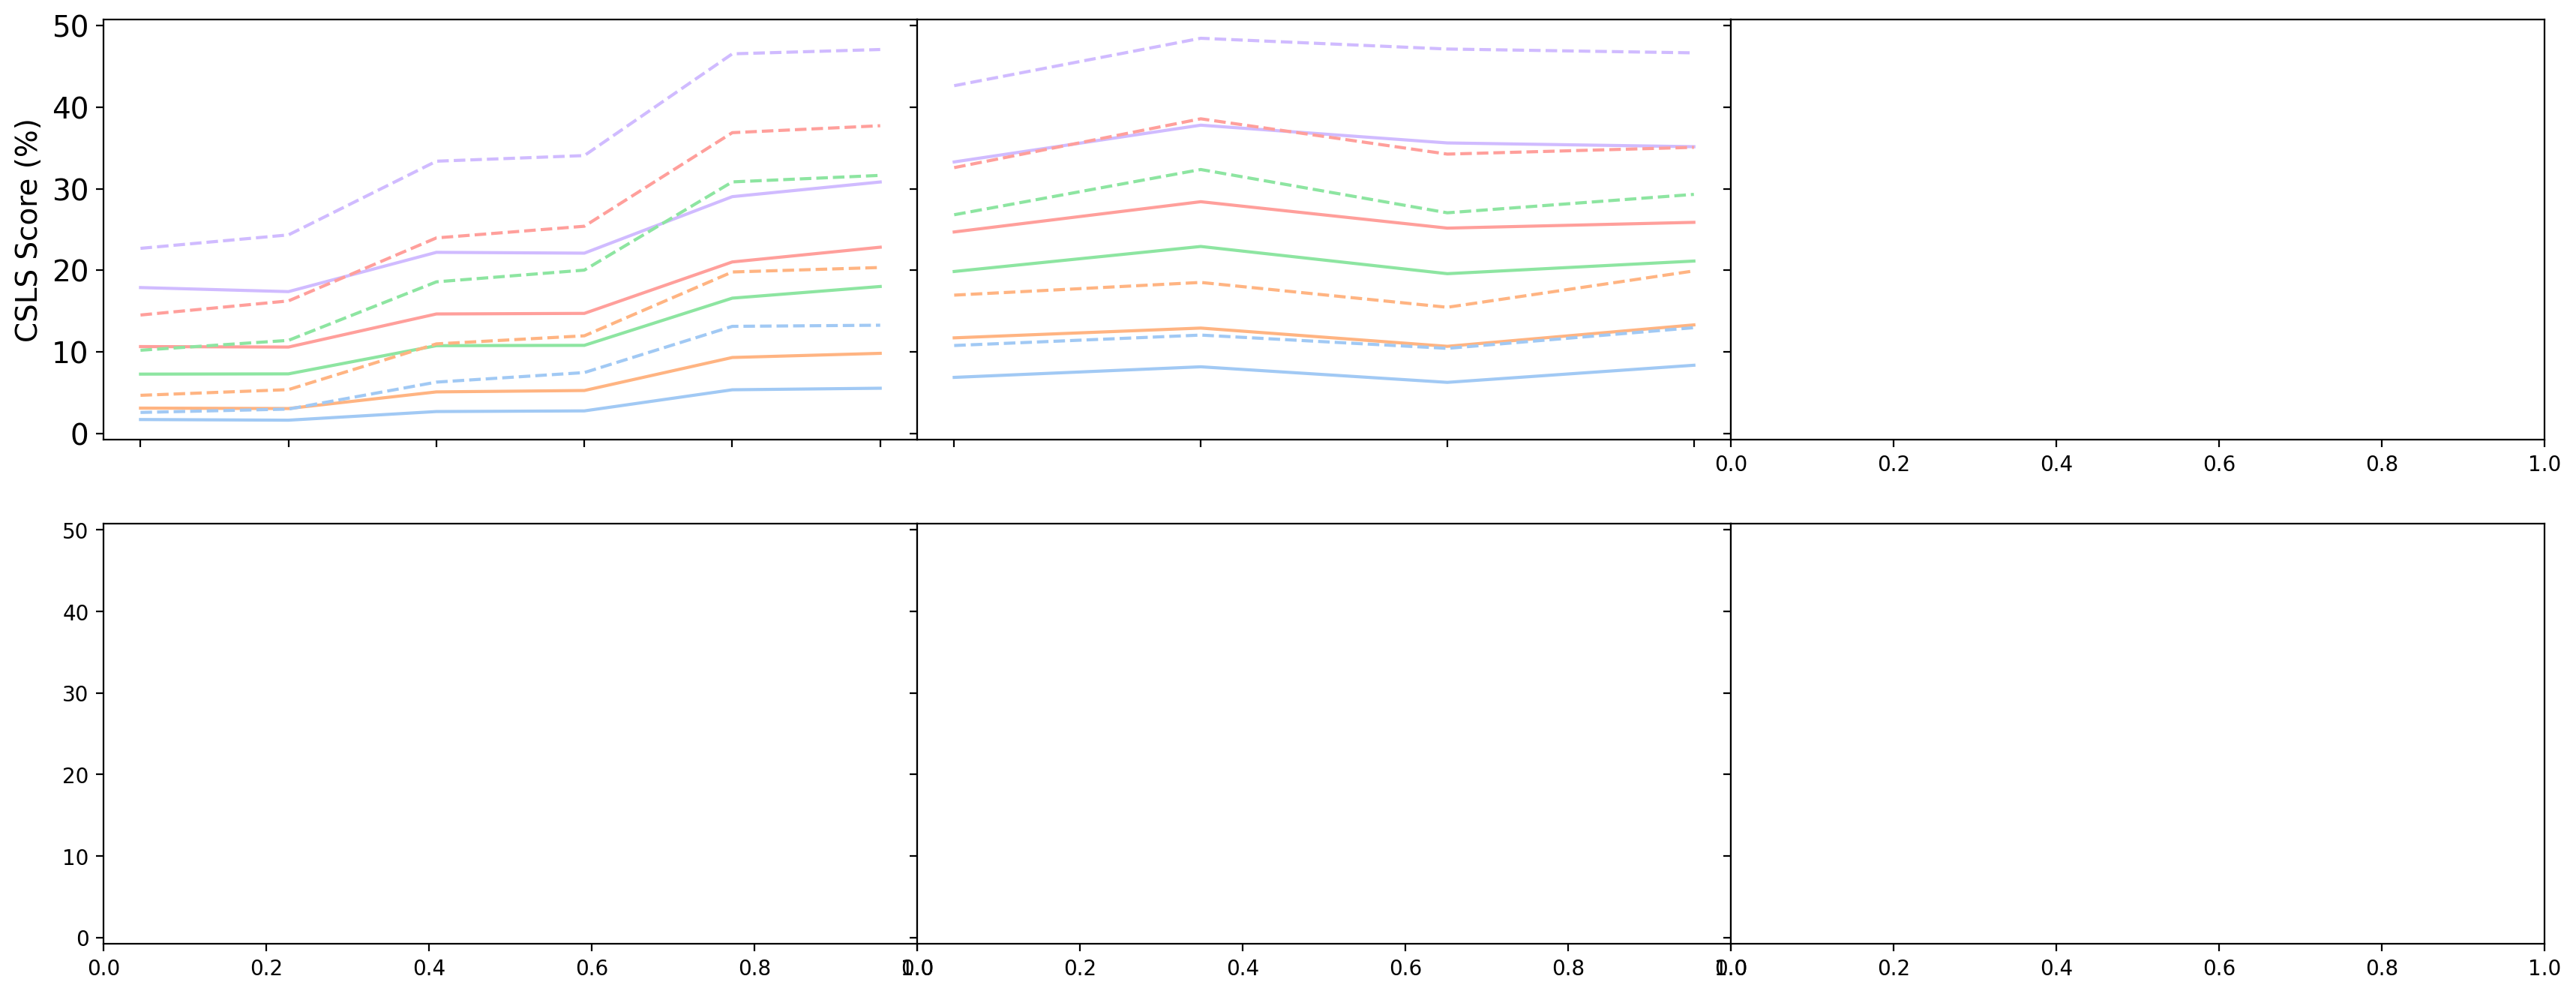

In [11]:
# plt.rcParams["font.family"] = "Times New Roman"
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, dpi=200, figsize =(21, 8), gridspec_kw = {'wspace':0, 'hspace':0.2})
# Define color palette
colors = sns.color_palette("pastel", 6)

# data_name = "Pereira"
data_name = "Harry Potter"
for rowid, nn_method in enumerate(["CSLS", "NN"]):
    for model_type, df in enumerate(df_res):
        if model_type == 0:
            x = [r"BERT$_{TINY}$", #4.4M
                r"BERT$_{MINI}$" , #11.3m
                r"BERT$_{SMALL}$", #29.1m
                r"BERT$_{MEDIUM}$", #41.7m
                r"BERT$_{BASE}$", #110m
                r"BERT$_{LARGE}$"] #340m
            model_name = "BERT"
            id_order = [2,3,4,5,0,1]
        elif model_type == 1:
            x = [r"GPT2$_{BASE}$", #117M
                r"GPT2$_{MEDIUM}$", #355M
                r"GPT2$_{LARGE}$", #762M
                r"GPT2$_{XL}$"] #1.5B
            model_name = "GPT2"
            id_order = [0,2,1,3]
        else:
            x = [r"OPT$_{125M}$", 
                r"OPT$_{1.3B}$",
                r"OPT$_{6.7B}$",
                r"OPT$_{30B}$"]
            model_name = "OPT"
            id_order = [1,0,3,2]

        precision_csls, precision_nn = [], []
        for k in [1, 5, 10, 30, 50, 100]:
            precision_csls.append(f'P@{k}-CSLS')
            precision_nn.append(f'P@{k}-NN')

        precision = precision_csls + precision_nn

        layer_avg = df.groupby(["Models", "Layers"])[precision].mean().reset_index()
        layer_avg = layer_avg.groupby(["Models"])[precision].max().reset_index()
        layer_avg.insert(loc=layer_avg.columns.get_loc("Models"), column="Summary",
                            value=[f"Ave Max."]*len(x))

        layer_ = df.groupby(["Models", "Layers", "Subjects"])[precision].mean().reset_index()
        layer_max = layer_.groupby(["Models"])[precision].max().reset_index()
        layer_max.insert(loc=layer_max.columns.get_loc("Models"), column="Summary",
                            value=[f"Single Max."]*len(x))

        save_dir = Path("./figures")
        save_dir.mkdir(parents=True, exist_ok=True)
        

        # Set the remaining columns as the Y-axis
        y_avg = layer_avg.reindex(index=id_order).iloc[:, 2:].round(2)
        y_max = layer_max.reindex(index=id_order).iloc[:, 2:].round(2)

        if nn_method == "CSLS":
            for idx, name in enumerate(y_avg.columns.values[1:6]):
                axs[rowid][model_type].plot(x, y_avg[name], label=f"{y_avg.columns.values[idx+1]}-AVG.", ls="-", color=colors[idx])
            for idx, name in enumerate(y_avg.columns.values[1:6]):
                axs[rowid][model_type].plot(x, y_max[name], label=f"{y_avg.columns.values[idx+1]}-MAX.", ls="--", color=colors[idx])
        else:
            for idx, name in enumerate(y_avg.columns.values[7:]):
                axs[rowid][model_type].plot(x, y_avg[name], label=f"{y_avg.columns.values[idx+7]}-AVG.", ls="-", color=colors[idx])
            for idx, name in enumerate(y_avg.columns.values[7:]):
                axs[rowid][model_type].plot(x, y_max[name], label=f"{y_avg.columns.values[idx+7]}-MAX.", ls="--", color=colors[idx])
        # Show the plot
        
        axs[rowid][model_type].tick_params(axis='y', labelsize=14)

        if model_type == 0:
            axs[rowid][model_type].set_ylabel(f"{nn_method} Score (%)",fontsize=14)
        if rowid == 1:
            axs[rowid][model_type].tick_params(axis='x', labelsize=14)
            axs[rowid][model_type].set_xticklabels(x, rotation=65)
        else:    
            axs[rowid][model_type].set_xticklabels([])
        # axs[rowid][model_type].set_xlabel("Model",fontsize=14)
        # i+=1
handles, labels = axs[0][0].get_legend_handles_labels()
order_list = [0, 5, 1,6, 2,7, 3,8, 4, 9]
# lines.extend(lines_01); labels.extend(labels_01)

fig.suptitle(f"Precision@K Performance ({METHOD})",fontsize=14).set_position((0.5,0.93))
fig.supxlabel(f"{data_name} Dataset", fontsize=14).set_position((0.5, -0.08))
fig.legend([handles[i] for i in order_list], [labels[i] for i in order_list], bbox_to_anchor=(0., -.08, 1., -.102), loc='center', fancybox=True,
        ncol=5, borderaxespad=0., fontsize=14)
# plt.savefig(f'./{save_dir}/{data_name}-Models-{method}-all.pdf', bbox_inches='tight')
plt.show()